# Analyzing the exit surveys of the DETE and TAFE <br/> (work in progress)

In this project, we analyse exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 
We aim at answering the following two questions: 
* Do employees working for these institutes for short periods of time leave because they are dissatisfied with them?
* How does the result depend on the employees age?

This project will mostly consist in cleaning two databases, corresponding to the DETE and TAFE, with the view of combining them in the analysis. 

## The databases 

As mentioned above, we work with two databases. 
The first one, `dete-exit-survey-january-2014.csv`, downloaded from the [Australian government website](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), contains staff feedback on why ther resign or retire from the DETE.
It was created on 25 March 2014 and never updated since then. 
The second one, `tafe-employee-exit-survey-access-database-december-2013.csv`, also downloaded from the [Australian government website](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey), contains similar information for the TAFE. 
It was created on 19 March 2014 and last updated on 10 July 2019. 
Both files were originally on the [Queensland Government Open Data Portal](https://www.data.qld.gov.au/).

Let us import the Numpy, Pandas, Seaborn, and Pyplot modules, and the two databases in the Pandas dataframes `dete_survey` and `tafe_survey`. 
We also print some information on each dataset.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100) # to show all columns
pd.options.mode.chained_assignment = None # To avoid false positive warnings
import seaborn as sns
import matplotlib.pyplot as plt

dete_survey = pd.read_csv('../Data/dete-exit-survey-january-2014.csv')
# the second file is encoded in latin-1
tafe_survey = pd.read_csv('../Data/tafe-employee-exit-survey-access-database-december-2013.csv', encoding='latin-1')

print(dete_survey.info())
print()
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

The first dataset has 822 row and 56 columns containing either “objects” (posibly strings) or bools, except the `ID` column which contains integers. 
The second one has 702 row and 72 columns containing “objects”, except the `ID` column whc contains integers and the `CESSATION YEAR` column which contains floats.
In both cases, a significant number of columns have missing values.

Let us now print the first few lines of each dataset.

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

There are numerous issues we will need to deal with: 
* Some columns in one dataframe have no equivalent in the other.
* The formats for the dates are different. 
* There are many columns; grouing them in a few categories would give us a better overall idea of the situation.
* The meaning of some entries in the first dataset, for example in the column `Kept informed`, is not clear.
* The second dataset has multiple occurrences of “-” denoting missing values; the first dataset has some occurrences of “Not Stated” denoting missing values.

We will thus need to extract the relevent columns from each dataset, group them into a few meaningful categories, convert dates to a common format, understand the meaning of unclear entries, and .
Let us first deal with the last point:

In [4]:
tafe_survey = tafe_survey.replace('-', np.nan)
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
dete_survey = dete_survey.replace('Not Stated', np.nan)
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Let us now visualize graphically the missing data in each dataset to get an idea of its distribution.

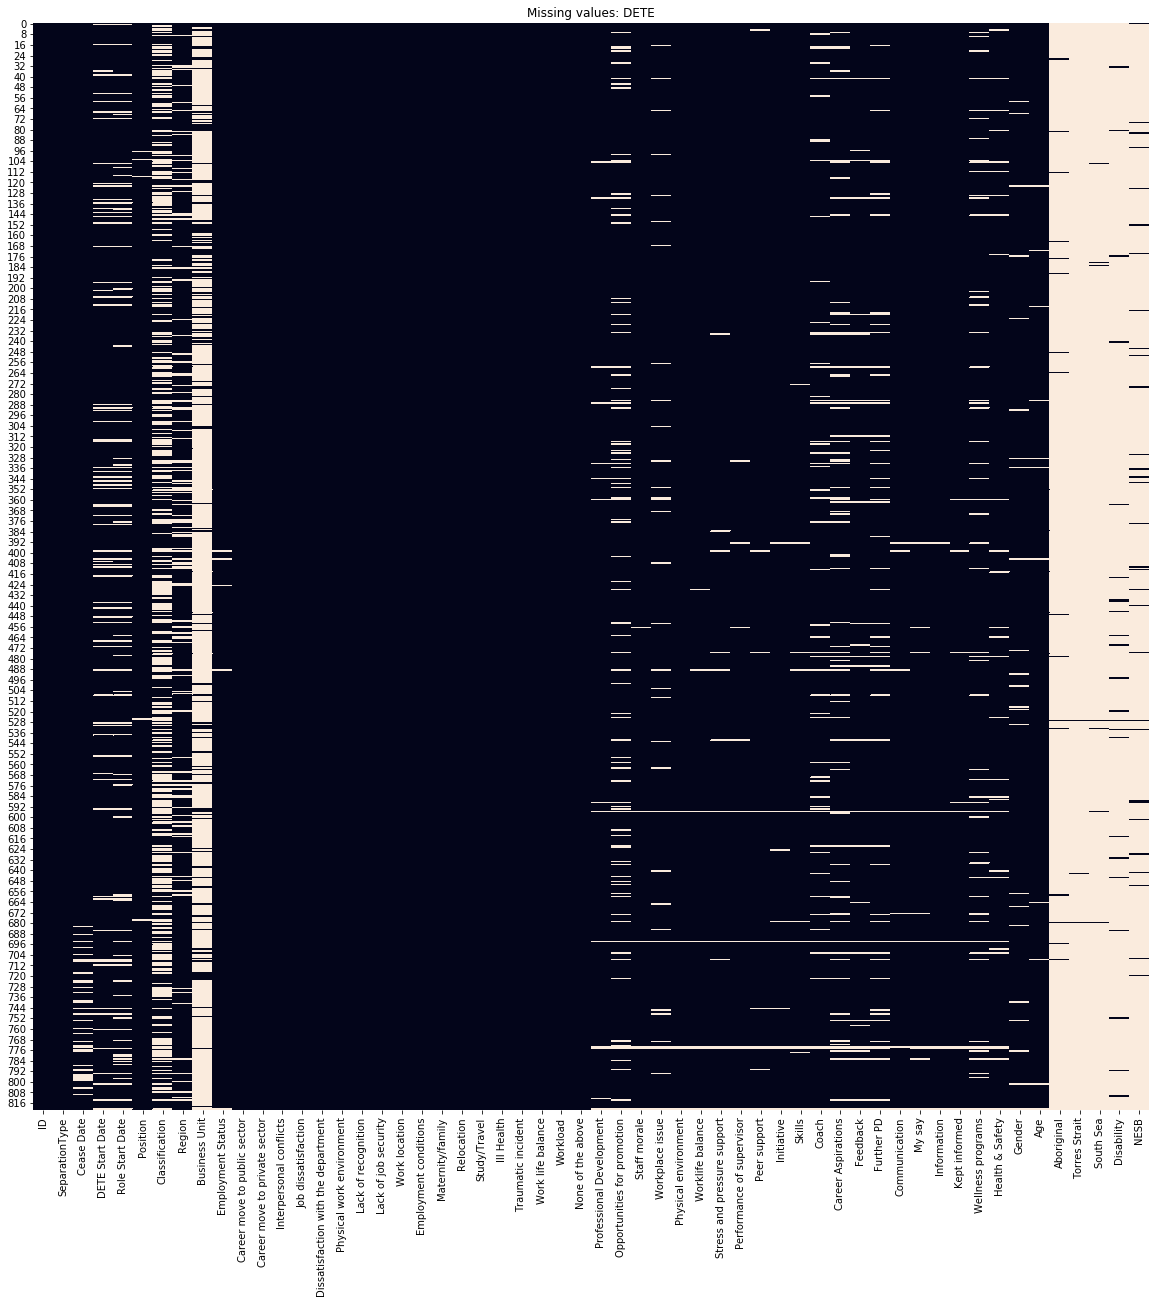

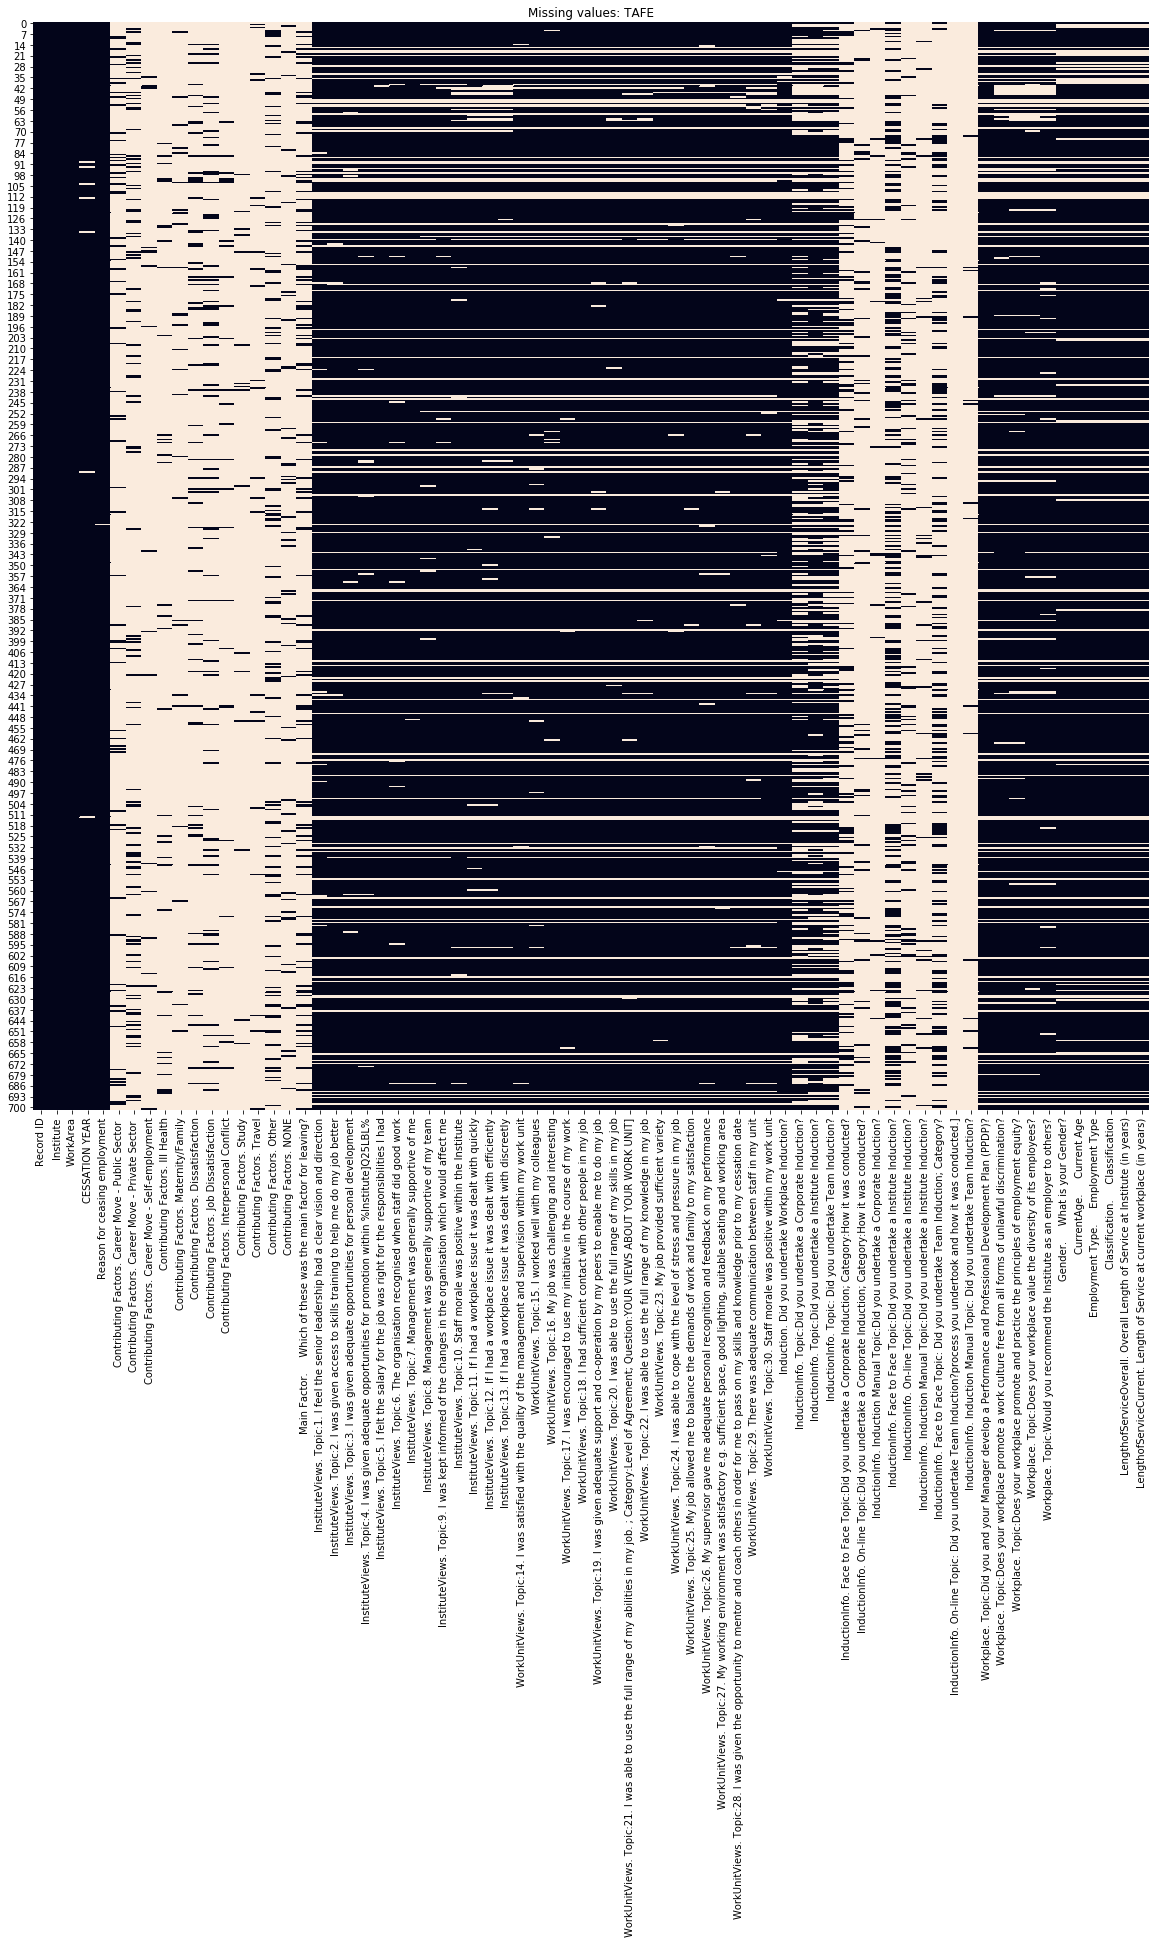

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(dete_survey.isnull(), cbar=False)
plt.title('Missing values: DETE')
plt.show()

plt.figure(figsize=(20,20))
sns.heatmap(tafe_survey.isnull(), cbar=False)
plt.title('Missing values: TAFE')
plt.show()

In the TAFE dataset, some lines have significantly more missing values than others. 
This is also true, to a lesser extent, for the DETE dataset.

## Data Cleaning

### Columns

Let us first delete the columns we do not need, *i.e.*, columns 28 to 48 in `dete_survey` and 17 to 65 in `tafe_survey`:

In [7]:
dete_survey.drop(dete_survey.columns[28:49], axis=1, inplace=True)
tafe_survey.drop(tafe_survey.columns[27:66], axis=1, inplace=True)

Let us now put the column names of `dete_survey` in snake case (lowercase, words separated by underscoores, no trailing or leading space):

In [8]:
dete_survey.rename({'SeparationType': 'Separation Type'}, axis=1, inplace=True)
dete_survey.columns = dete_survey.columns.str.strip().str.lower().str.replace(' ','_')
dete_survey.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We then rename some of the columns of `tafe_survey` to match those of `dete_survey`:

In [9]:
new_names = {'Record ID':'ID', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separation_type', 
             'Gender. \xa0\xa0\xa0\xa0What is your Gender?':'gender', 'CurrentAge. \xa0\xa0\xa0\xa0Current Age':'age',
            'Employment Type. \xa0\xa0\xa0\xa0Employment Type': 'employment_status', 'Classification. \xa0\xa0\xa0\xa0Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey.rename(new_names, axis=1, inplace=True)
tafe_survey.head()

,ID,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,gender,age,employment_status,position,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Travel,NaN,NaN,NaN,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Travel,NaN,NaN,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,Career Move - Private Sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Converting dates to floats

To pursue the analysis, it will be convenient to have the dates in `dete_survey` as floats. 
We keep only the years, and discard the months.

In [10]:
dete_survey['cease_date'] = pd.to_datetime(dete_survey['cease_date']).dt.year
dete_survey['dete_start_date'] = dete_survey['dete_start_date'].astype(float)
dete_survey['role_start_date'] = dete_survey['role_start_date'].astype(float)
dete_survey.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,2012.0,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),2012.0,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),2012.0,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,2012.0,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Converting ages to floats

We now wish to turn the `age` column to floats. 
As this column contains age intervals, we will retain only the lower bound of the interval. 
Let us first see which values it contains. 

In [11]:
print(dete_survey['age'].value_counts(dropna=False))
print()
print(tafe_survey['age'].value_counts(dropna=False))

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: age, dtype: int64

56 or older      162
NaN              106
51-55             82
41  45           80
46  50           59
31  35           52
36  40           51
26  30           50
21  25           44
20 or younger     16
Name: age, dtype: int64


When the value is set, the lower bound is always given by the first word if the string is split by the tw characters ' ' and '-'. 
We thus define the function `age_range_to_lower_bound` taking a Pandas series of strings, splitting it by these two characters, and returnin the first word if it exists, or NaN otherwise.

In [12]:
def first_word_or_nothing(l):
    '''
    Returns the first element of l. If l is not a list or empty, returns NaN.
    l: list or NaN
    '''
    if type(l) is not list or len(l) == 0:
        return np.nan
    else: 
        return l[0]

def age_range_to_lower_bound(series):
    return series.str.replace('-', ' ').str.split(' ').map(first_word_or_nothing).astype(float)

In [13]:
dete_survey['age'] = age_range_to_lower_bound(dete_survey['age'])
tafe_survey['age'] = age_range_to_lower_bound(tafe_survey['age'])

### Selection of the relevant lines

In the following, we will focus on the employees who resigned. 
We thus keep only the lines for which the `separation_type` value contains the word 'Resignation'. 
Let us first see which values this column contains in each dataframe:

In [14]:
print(dete_survey['separation_type'].value_counts())
print()
print(tafe_survey['separation_type'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64


We can thus retain the lines whose `separation type` contains 'Resignation' in the `dete_survey` dataframe and those whose `separation type` is 'Resignation' in the `tafe_survey` dataframe. 
We assign the resulting dataframes to `dete_resignations` and `tafe_resignations`.

In [15]:
dete_resignations = dete_survey[dete_survey['separation_type'].str.match('Resignation')]
tafe_resignations = tafe_survey[tafe_survey['separation_type'] == 'Resignation']

### Verifying the data

Let us now look for obvious inconsistencies. 
To this end, we first show box plots of the columns `age` and `cease_date`.

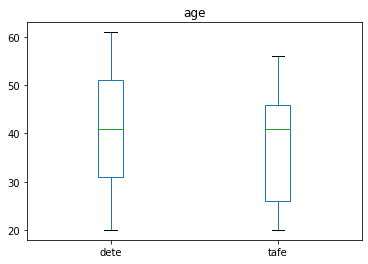

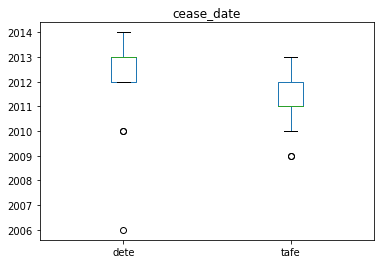

In [16]:
def boxplot_dete_tafe(column):
    '''
    show a box plot of the columns labelles 'column' in the dete_resignations and tafe_resignation dataframes
    column: string
    '''
    dete_col_reindexed = dete_resignations[column].reset_index()[column].rename('dete')
    tafe_col_reindexed = tafe_resignations[column].reset_index()[column].rename('tafe')
    pd.concat([dete_col_reindexed, tafe_col_reindexed], axis=1).plot.box(title=column)
    plt.show()
    
boxplot_dete_tafe('age')
boxplot_dete_tafe('cease_date')

These values look broadly consistent. 
there are three outliers, but they do not seem obviously wrong.

Let us now draw bar plots for the `dete_start_date` and `role_start_date` in the `dete_resignations`.

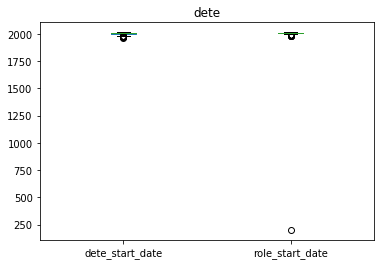

In [17]:
dete_resignations[['dete_start_date','role_start_date']].plot.box(title='dete')

There is an unrealistically low value in the `role_start_date` column. 
Let us remove this value.

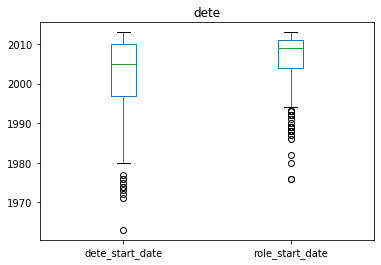

In [18]:
index_min_value = dete_resignations['role_start_date'].idxmin()
dete_resignations.at[index_min_value, 'role_start_date'] = np.nan
dete_resignations[['dete_start_date','role_start_date']].plot.box(title='dete')
plt.show()

All values now look sensible, although there are outliers.

### Length of service

We now create a new column `institute_service` in the `dete_resignations` dataset, containing the number of years spent in the DETE.

In [19]:
len_service = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'] = len_service
dete_resignations.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36.0,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41.0,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31.0,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46.0,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31.0,NaN,NaN,NaN,NaN,NaN,3.0


Let us now deal with the same column, as well as `role_service`, in the `tafe_resignations` dataframe. 
We first show the values they contain.

In [20]:
print(tafe_resignations['institute_service'].value_counts(dropna=False))
print()
print(tafe_resignations['role_service'].value_counts(dropna=False))

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Less than 1 year      92
1-2                   74
3-4                   54
NaN                   50
5-6                   22
11-20                 21
7-10                  19
More than 20 years     8
Name: role_service, dtype: int64


Let us replace “Less than 1 year” by 0.5, “More than 20 years” by 20, and each interval by its mid-point. 

In [21]:
def replacements_tafe_institute_service(st):
    if type(st) is not str: # if st is NaN, return NaN
        return st
    if st[0] == 'L': # st is 'Less than 1 year'
        return 0.5
    elif st[0] == 'M': # st is 'More than 20 years'
        return 20
    else:
        st_split = st.split('-')
        return 0.5*(float(st_split[0])+float(st_split[1]))

tafe_resignation_len_institute = tafe_resignations.loc[:,'institute_service'].map(replacements_tafe_institute_service)
tafe_resignations.loc[:,'institute_service'] = tafe_resignation_len_institute

tafe_resignation_len_role = tafe_resignations.loc[:,'role_service'].map(replacements_tafe_institute_service)
tafe_resignations.loc[:,'role_service'] = tafe_resignation_len_role

tafe_resignations.head()

,ID,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,gender,age,employment_status,position,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Travel,NaN,NaN,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,Career Move - Private Sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Male,41.0,Permanent Full-time,Teacher (including LVT),3.5,3.5
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,Neutral,Neutral,Neutral,Neutral,Agree,Neutral,Neutral,Neutral,Neutral,Female,56.0,Contract/casual,Teacher (including LVT),8.5,8.5
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,Career Move - Private Sector,NaN,NaN,Maternity/Family,NaN,NaN,NaN,NaN,NaN,Other,NaN,Career Move - Private Sector,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Male,20.0,Temporary Full-time,Administration (AO),3.5,3.5
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,Disagree,Agree,Agree,Disagree,Strongly Disagree,Neutral,Agree,Neutral,Agree,Male,46.0,Permanent Full-time,Teacher (including LVT),3.5,3.5


## Data Analysis

### Dissatisfied employees 

We now select the lines corresponding to employees who resigned because they were dissatisfied. 
In the `dete_resignation` dataset, we estimate that an employee was dissatisfied with their job if in one of the values for `job_dissatisfaction`, `dissatisfaction_with_the_department`, `physical_work_environment`, `lack_of_recognition`, `lack_of_job_security`, `work_location`, `employment_conditions`, `work_life_balance`, or `workload` is `True`. 
In the `tafe_resignation` dataset, we estimate that an employee was dissatisfied with their job if one of the values for `Contributing Factors. Dissatisfaction` or `Contributing Factors. Job Dissatisfaction` is not empty. 
To check this is sensible, let us see which values these coluns contain.

In [22]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print()
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

Contributing Factors. Dissatisfaction     55
Name: Contributing Factors. Dissatisfaction, dtype: int64

Job Dissatisfaction    62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Each of these columns contains only one non-NaN value, which indeed indicates dissatisfaction. 
To make the analysis easier, we replace these values by `True`:

In [23]:
tafe_resignations['Contributing Factors. Dissatisfaction'].replace('Contributing Factors. Dissatisfaction ', True, inplace=True)
tafe_resignations['Contributing Factors. Job Dissatisfaction'].replace('Job Dissatisfaction', True, inplace=True)

We then add a column `dissatisfied` to each of these dataframes, with value `True` if the employee was dissatisfied and `False` otherwise.

In [24]:
columns_dissatisfied_dete = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                             'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 
                             'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations[columns_dissatisfied_dete].any(axis=1)

columns_dissatisfied_tafe = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[columns_dissatisfied_tafe].any(axis=1)

### Combining the dataframes

Let us combine the two dataframes. 
To distinguish between employees from the two institutes, we add a column `institute` containing “DETE” or “TAFE”. 
We then combine the two dataframes in `combined_resignations` and, to avoid keeping unnecessary columns, drop those wth less than 500 non-null values.

In [25]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'
combined_resignations = pd.concat([dete_resignations,tafe_resignations], sort=False).dropna(axis=1, thresh=500)
combined_resignations

,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36.0,7.0,False,DETE
5,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41.0,18.0,True,DETE
8,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31.0,3.0,False,DETE
9,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46.0,15.0,True,DETE
11,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31.0,3.0,False,DETE
12,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36.0,14.0,False,DETE
14,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31.0,5.0,True,DETE
16,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61.0,NaN,True,DETE
20,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56.0,30.0,False,DETE
21,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51.0,32.0,False,DETE


Let us now turn values in the `instituute_service` to more directly useful ones.
[This article from BusinessWire](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) reports that the institute [Padilla](https://padillaco.com/) defines four key career stages: Newbie (3 years of experience or less), Sophomore (4 to 7 years of experience), Tenured (8 to 10 yers), and Sage (11 years or more). 
Let us use this classification.

In [26]:
def float_to_padilla_stage(x):
    '''
    returns the Padilla career stage associated corresponding to having worked int(x) years at a company
    x: float
    '''
    if x < 0 or np.isnan(x):
        return np.nan
    if x < 4:
        return 'Newbie'
    if x < 8:
        return 'Sophomore'
    if x < 11:
        return 'Tenured'
    if x >=11: 
        return 'Sage'

combined_resignations['institute_service'] = combined_resignations['institute_service'].map(float_to_padilla_stage)

### Fraction of dissatisfied employees

Let us compute the number and fraction of employees who resigned because they were dissatisfied.

In [27]:
print(combined_resignations['dissatisfied'].value_counts())

percentage_dissatisfied = 100*combined_resignations.loc[combined_resignations['dissatisfied'], 'dissatisfied'].count() / combined_resignations['dissatisfied'].count()
print('\nFraction of resigning employees dissatisfied: {:.2f}%'.format(percentage_dissatisfied))

False    411
True     240
Name: dissatisfied, dtype: int64

Fraction of resigning employees dissatisfied: 36.87%


It seems that nearly 37% of employees who resigned were dissatisfied with their jobs. 
Let us now use a pivot table to compute the fraction of dissatisfied employees for each career stage. 

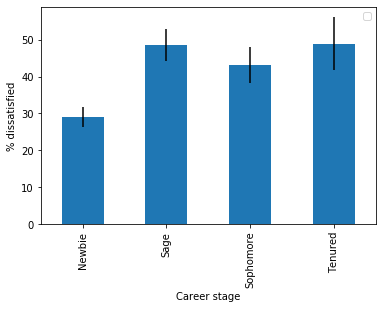

In [28]:
# pivot table: percentages of dissatisfied employees
dissatisfied_vs_career_stage = pd.pivot_table(combined_resignations, values = 'dissatisfied', index = 'institute_service', aggfunc = lambda x: 100*x.mean())

# pivot table: standard error
dissatisfied_vs_career_stage_ste = pd.pivot_table(combined_resignations, values = 'dissatisfied', index = 'institute_service', aggfunc = lambda x: 100*x.std()/np.sqrt(len(x)))

# bar plot
# the error bars correspond to one standard error up and down
ax = dissatisfied_vs_career_stage.plot(kind = 'bar', yerr = dissatisfied_vs_career_stage_ste['dissatisfied'])
ax.set_xlabel('Career stage')
ax.set_ylabel('% dissatisfied')
ax.legend([])
plt.show()

It seems that **employees at the “Newbie” career stage are notably less likely to resign because they are dissatisfied with their jobs than their more experienced co-workers**. 
The differences between results for the other carreer stages are not statistically significant.

<font style="color:rgb(0,100,200)"><b>
    To do: <ul>
        <li> See if the dissatisfaction rate varies with age. </li>
        <li> See if there are statistically significant differences between the two datasets. </li>
    </ul>
</b></font>